# K means cluster

* package installation

In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_samples
from sklearn import cluster
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance
import collections
import datetime
import time

* Guiding Question 1 

In [3]:
df = pd.read_csv('processed.cleveland_ini_pre.csv')
df_1 = pd.DataFrame(df, columns=['#3(age)','#4(sex)','#58(num)'])
df_target = pd.DataFrame(df, columns=['#58(num)'])
df_target = np.concatenate(df_target.as_matrix())
Kmean_score = np.zeros((20,1))
for i in range(20):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df_1)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

      
# plt.figure(figsize=(10,5))
# plt.plot(np.arange(1,21), Kmean_score, lw=2)
# plt.xlabel('number of clusters')
# plt.ylabel('SSE')
# plt.title('Optimal cluster number by K means method (Q1)',fontsize=12)
# plt.show()


start_time = time.time()
k_1 = cluster.KMeans(n_clusters=5, random_state=0).fit(df_1)
# print(k_1.labels_)
load_time_k_1 = time.time() - start_time
# Get predict cluster from weka result
K_1_pre = [0]*len(df_target)
for i in range(len(df_target)):
    if df_target[i] == 0:
        K_1_pre[i] = 0
        
    elif df_target[i] == 1:
        K_1_pre[i] = 4
        
    elif df_target[i] == 2:
        K_1_pre[i] = 2
        
    elif df_target[i] == 3:
        K_1_pre[i] = 3
        
    elif df_target[i] == 4:
        K_1_pre[i] = 1


## Merics
print("Normalized mutual information score is %.8s." % (normalized_mutual_info_score(k_1.labels_,K_1_pre)))  
print("V-measure score is %.8s." % (v_measure_score(k_1.labels_,K_1_pre)))
SS_value = [silhouette_samples(df_1,k_1.labels_),k_1.labels_]
SS_value = pd.DataFrame(SS_value)
SS_value = np.array(SS_value.T.sort_values(by=[1], ascending=[True]).drop([1],1))
cluster_num = [0]*len(collections.Counter(k_1.labels_))
for i in range(len(cluster_num)):
    cluster_num[i] = collections.Counter(k_1.labels_)[i]
cluster_cum = np.cumsum(cluster_num)
ran = len(cluster_cum)
for i in range(ran):
    if i == 0:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[0:cluster_cum[i]])))
    else:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]])))

for i in range(ran):
    if i == 0:
        print(np.mean(SS_value[0:cluster_cum[i]]))
    else:
        print(np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]]))

print("SSE is %.8s." % (k_1.inertia_))
cluster_percentage = [0]*5
print()
print('Percentage of clusters')
for i in range(5):
    print(collections.Counter(k_1.labels_)[i]*100/297)

Normalized mutual information score is 0.840659.
V-measure score is 0.836702.
Average Silhouette Coefficient for cluster 0 is 0.6223.
Average Silhouette Coefficient for cluster 1 is 0.8034.
Average Silhouette Coefficient for cluster 2 is 0.5880.
Average Silhouette Coefficient for cluster 3 is 0.7614.
Average Silhouette Coefficient for cluster 4 is 0.4655.
0.622368261186
0.803439928985
0.588073863753
0.761474555383
0.465524942487
SSE is 39.59993.

Percentage of clusters
11.784511784511784
29.966329966329965
18.181818181818183
23.905723905723907
16.161616161616163


* Guiding Question 2

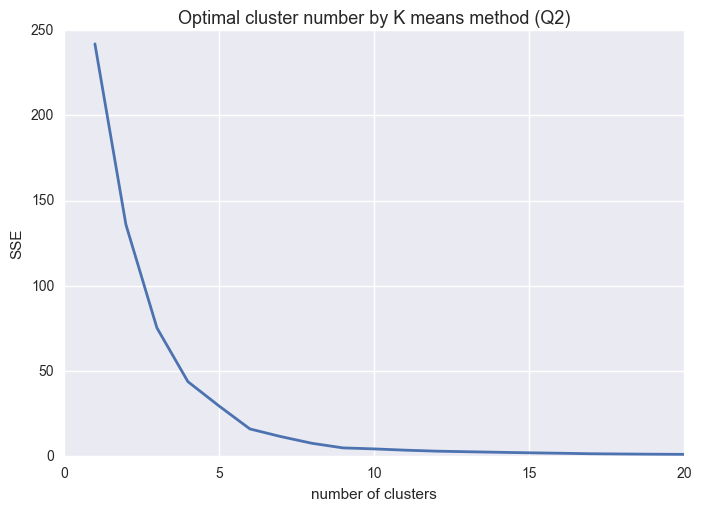



Normalized mutual information score is 0.130988.
V-measure score is 0.130915.
Average Silhouette Coefficient for cluster 0 is 0.8037.
Average Silhouette Coefficient for cluster 1 is 0.6934.
Average Silhouette Coefficient for cluster 2 is 0.7790.
Average Silhouette Coefficient for cluster 3 is 0.6603.
Average Silhouette Coefficient for cluster 4 is 0.8150.
0.803724158909
0.693487747208
0.779045286186
0.660304466969
0.815084406678
SSE is 29.58957.

Percentage of clusters
42.42424242424242
27.946127946127945
16.4983164983165
7.744107744107744
5.3872053872053876


In [5]:
df_2 = pd.DataFrame(df, columns=['#9(cp)=TypicalAngina','#9(cp)=Asymptomatic','#9(cp)=NonAnginalPain','#9(cp)=AtypicalAngina',
                                 '#16(fbs)','#32(thalach)'])

Kmean_score = np.zeros((20,1))
for i in range(20):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df_2)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

# plt.figure(figsize=(10,5))
plt.plot(np.arange(1,21), Kmean_score, lw=2)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Optimal cluster number by K means method (Q2)',fontsize=13)
plt.show()

start_time = time.time()
k_2 = cluster.KMeans(n_clusters=5, random_state=0).fit(df_2)
# print(k_2.labels_)
print()
# print(k_2.cluster_centers_)
print()
# print(k_2.inertia_)
load_time_k_2 = time.time() - start_time

# Get predict cluster from weka result
K_2_pre = [0]*len(df_target)
for i in range(len(df_target)):
    if df_target[i] == 0:
        K_2_pre[i] = 4
        
    elif df_target[i] == 1:
        K_2_pre[i] = 2
        
    elif df_target[i] == 2:
        K_2_pre[i] = 3
        
    elif df_target[i] == 3:
        K_2_pre[i] = 0
        
    elif df_target[i] == 4:
        K_2_pre[i] = 1


## Merics
print("Normalized mutual information score is %.8s." % (normalized_mutual_info_score(k_2.labels_,K_2_pre)))  
print("V-measure score is %.8s." % (v_measure_score(k_2.labels_,K_2_pre)))
SS_value = [silhouette_samples(df_2,k_2.labels_),k_2.labels_]
SS_value = pd.DataFrame(SS_value)
SS_value = np.array(SS_value.T.sort_values(by=[1], ascending=[True]).drop([1],1))
cluster_num = [0]*len(collections.Counter(k_2.labels_))
for i in range(len(cluster_num)):
    cluster_num[i] = collections.Counter(k_2.labels_)[i]
cluster_cum = np.cumsum(cluster_num)
ran = len(cluster_cum)
for i in range(ran):
    if i == 0:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[0:cluster_cum[i]])))
    else:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]])))

for i in range(ran):
    if i == 0:
        print(np.mean(SS_value[0:cluster_cum[i]]))
    else:
        print(np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]]))
        
print("SSE is %.8s." % (k_2.inertia_))
cluster_percentage = [0]*5
print()
print('Percentage of clusters')
for i in range(5):
    print(collections.Counter(k_2.labels_)[i]*100/297)

In [4]:
k_2 = cluster.KMeans(n_clusters=5, random_state=0).fit(df_2)

print("SSE is %.8s." % (k_2.inertia_))
cluster_percentage = [0]*6
print()
print('Percentage of clusters')
for i in range(6):
    print(collections.Counter(k_2.labels_)[i]*100/297)

SSE is 29.58957.

Percentage of clusters
42.42424242424242
27.946127946127945
16.4983164983165
7.744107744107744
5.3872053872053876
0.0


* Guiding Question 3

In [6]:
Kmean_score = np.zeros((20,1))
for i in range(20):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

# # plt.figure(figsize=(10,5))
# plt.plot(np.arange(1,21), Kmean_score, lw=2)
# plt.xlabel('number of clusters')
# plt.ylabel('SSE')
# plt.title('Optimal cluster number by K means method (Q3)',fontsize=13)
# plt.show()

start_time = time.time()
k = cluster.KMeans(n_clusters=5, random_state=0).fit(df)
# print(k.labels_)
# print()
# print(k.cluster_centers_)
# print()
# print(k.inertia_)
load_time_k_3 = time.time() - start_time


# Get predict cluster from weka result
K_3_pre = [0]*len(df_target)
for i in range(len(df_target)):
    if df_target[i] == 0:
        K_3_pre[i] = 0
        
    elif df_target[i] == 1:
        K_3_pre[i] = 2
        
    elif df_target[i] == 2:
        K_3_pre[i] = 3
        
    elif df_target[i] == 3:
        K_3_pre[i] = 1
        
    elif df_target[i] == 4:
        K_3_pre[i] = 4


## Merics
print("Normalized mutual information score is %.8s." % (normalized_mutual_info_score(k.labels_,K_3_pre)))  
print("V-measure score is %.8s." % (v_measure_score(k.labels_,K_3_pre)))
SS_value = [silhouette_samples(df,k.labels_),k.labels_]
SS_value = pd.DataFrame(SS_value)
SS_value = np.array(SS_value.T.sort_values(by=[1], ascending=[True]).drop([1],1))
cluster_num = [0]*len(collections.Counter(k.labels_))
for i in range(len(cluster_num)):
    cluster_num[i] = collections.Counter(k.labels_)[i]
cluster_cum = np.cumsum(cluster_num)
ran = len(cluster_cum)
for i in range(ran):
    if i == 0:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[0:cluster_cum[i]])))
    else:
        print("Average Silhouette Coefficient for cluster %.6s is %.6s." % (i,np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]])))
for i in range(ran):
    if i == 0:
        print(np.mean(SS_value[0:cluster_cum[i]]))
    else:
        print(np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]]))
        
print("SSE is %.8s." % (k.inertia_))
cluster_percentage = [0]*5
print()
print('Percentage of clusters')
for i in range(5):
    print(collections.Counter(k.labels_)[i]*100/297)

Normalized mutual information score is 0.497221.
V-measure score is 0.494694.
Average Silhouette Coefficient for cluster 0 is 0.0597.
Average Silhouette Coefficient for cluster 1 is 0.1885.
Average Silhouette Coefficient for cluster 2 is 0.1767.
Average Silhouette Coefficient for cluster 3 is 0.1798.
Average Silhouette Coefficient for cluster 4 is 0.2823.
0.0597695339366
0.188558950917
0.176710114097
0.179843077553
0.282335440823
SSE is 567.1208.

Percentage of clusters
17.50841750841751
23.569023569023567
11.11111111111111
21.54882154882155
26.262626262626263


In [6]:
pca = PCA(n_components=1)
df_1_pca = np.ravel(pca.fit_transform(df_1))
DDD = [df_1_pca.T,k_1.labels_]
df_1_db = pd.DataFrame(DDD)
df_1_db = np.array(df_1_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_1_distance = pairwise_distances(df_1_db, metric='euclidean')
d_1_max = np.amax(df_1_distance)
d_1_min = np.amin(df_1_distance)
df_1_similarity = np.zeros([297,297])
for i in range(len(df_1_distance)):
    for j in range(len(df_1_distance)):
        df_1_similarity[i,j] = 1-(df_1_distance[i,j]-d_1_min)/(d_1_max-d_1_min)

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8,7))
cmap = sns.diverging_palette(220, 8, as_cmap=True)
sns.heatmap(df_1_similarity, cmap='GnBu',vmax=1, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for K-means cluster (Q1)',fontsize=15)
# plt.imshow(df_1_similar, cmap='BrBG', interpolation='nearest')
plt.savefig('k1.jpg')

In [7]:
pca = PCA(n_components=1)
df_2_pca = np.ravel(pca.fit_transform(df_2))
DDD = [df_2_pca.T,k_2.labels_]
df_2_db = pd.DataFrame(DDD)
df_2_db = np.array(df_2_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_2_distance = pairwise_distances(df_2_db, metric='euclidean')
d_2_max = np.amax(df_2_distance)
d_2_min = np.amin(df_2_distance)
df_2_similarity = np.zeros([297,297])
for i in range(len(df_2_distance)):
    for j in range(len(df_2_distance)):
        df_2_similarity[i,j] = 1-(df_2_distance[i,j]-d_2_min)/(d_2_max-d_2_min)

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8,7))
cmap = sns.diverging_palette(220, 8, as_cmap=True)
sns.heatmap(df_2_similarity, cmap='GnBu',vmax=1, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for K-means cluster (Q2)',fontsize=15)
# plt.imshow(df_1_similar, cmap='BrBG', interpolation='nearest')
plt.savefig('k2.jpg')

In [8]:
pca = PCA(n_components=1)
df_3_pca = np.ravel(pca.fit_transform(df))
DDD = [df_3_pca.T,k.labels_]
df_3_db = pd.DataFrame(DDD)
df_3_db = np.array(df_3_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_3_distance = pairwise_distances(df_3_db, metric='euclidean')
d_3_max = np.amax(df_3_distance)
d_3_min = np.amin(df_3_distance)
df_3_similarity = np.zeros([297,297])
for i in range(len(df_3_distance)):
    for j in range(len(df_3_distance)):
        df_3_similarity[i,j] = 1-(df_3_distance[i,j]-d_3_min)/(d_3_max-d_3_min)

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8,7))
cmap = sns.diverging_palette(220, 8, as_cmap=True)
sns.heatmap(df_3_similarity, cmap='GnBu',vmax=1, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for K-means cluster (Q3)',fontsize=15)
# plt.imshow(df_1_similar, cmap='BrBG', interpolation='nearest')
plt.savefig('k3.jpg')

In [9]:
print("It took %.8s seconds to form K means cluster for Q1" % (load_time_k_1))
print("It took %.8s seconds to form K means cluster for Q2" % (load_time_k_2))
print("It took %.8s seconds to form K means cluster for Q3" % (load_time_k_3))

It took 0.018071 seconds to form K means cluster for Q1
It took 0.023560 seconds to form K means cluster for Q2
It took 0.029077 seconds to form K means cluster for Q3
